# Intro

In this notebook, the main feature extraction methods for text are exemplified with tools from scikit-learn.
These steps involve: 

- bow model;
- tfidf mode;
- word embedding;


## Scikit-learn for BoW and TFIDF

### Bag of Words Model

The Bag of Words (BoW) model calculates the number of word/token
occurrences in each document. This information is usually stored in a
matrix of data with the rows being the documents and the columns each
unique word found. Mathematically, the model calculates the term
frequency/raw counts, *tf*, which is defined as:

$$tf_{t,d} = \frac{f_{t,d}}{\sum\limits_{t'\in d} f_{t',d}}$$

, being *t* the term that exists in all documents, *d* the document,
*t'* the term that belongs to document *d*. Additionally, the term can
also be an N-gram, instead of a single word. This strategy is employed
in several problems to provide more contextual information of words. In
this case, the features extracted are purely statistical, but can
provide a relevant measure of differences between documents.

### TFIDF

One of the reported issues of the *BoW* model is evaluating the
relevance of a word based on its frequency in all documents, while not
considering that words that occur in all documents might be less
relevant. In that sense, as the *BoW* model, the *Tf-idf* model
increases the relevance of a word by means of its raw occurrences, while
reducing its importance in proportion to the number of documents that
contain that word. The model is defined by being a ratio between the
*tf* and the *inverse document frequency (idf)*, which is calculated as
follows:

$$idf(t, D) = \log \frac{N}{|{d \in D: t \in d}|}$$

, being *D*, the set of documents and *N* the total number of documents.
The final equation of the *Tf-idf* model is the following:

$$tfidf(t, d, D) = tf(t,d) \cdot idf(t,D)$$


## Methods

The scikit-learn package provides a set of methods to extract the BoW and TFIDF models. These are performed by Vectorizers:

- (1) CountVectorizer
- (2) TfidfVectorizer

You will find how to implement these in the following sentences:

In [28]:
#Load main notebook libraries
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [36]:
corpus = [
    "I am super motivated",
    "I am super interested",
    "I fly away but always come back",
    "My cat always comes back"]

bow_vec = CountVectorizer()
bow = bow_vec.fit_transform(corpus)
tfidf_vec = TfidfVectorizer()
tfidf = tfidf_vec.fit_transform(corpus)

bow_data = pd.DataFrame(bow.toarray(),columns= bow_vec.get_feature_names())
tfidf_data = pd.DataFrame(tfidf.toarray(),columns= tfidf_vec.get_feature_names())

display(bow_data)
display(tfidf_data)

,always,am,away,back,but,cat,come,comes,fly,interested,motivated,my,super
0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,1,0,1,1,1,0,1,0,1,0,0,0,0
3,1,0,0,1,0,1,0,1,0,0,0,1,0


,always,am,away,back,but,cat,come,comes,fly,interested,motivated,my,super
0,0.000000,0.526405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.667679,0.000000,0.526405
1,0.000000,0.526405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.667679,0.000000,0.000000,0.526405
2,0.344315,0.000000,0.436719,0.344315,0.436719,0.000000,0.436719,0.000000,0.436719,0.000000,0.000000,0.000000,0.000000
3,0.382743,0.000000,0.000000,0.382743,0.000000,0.485461,0.000000,0.485461,0.000000,0.000000,0.000000,0.485461,0.000000


In [174]:
corpus = [
    "I am super motivated",
    "My cat always comes back"]
sentence3 = "The cat is back"

bow_vec = CountVectorizer()
bow = bow_vec.fit_transform(corpus)

sent3_bow = bow_vec.transform([sentence3])
1-cosine_similarity(sent3_bow, bow)



array([[1.        , 0.36754447]])

<AxesSubplot:>

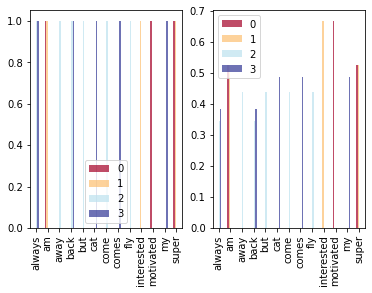

In [37]:
#Representing the histogram of bow or tfidf
fig, axs = plt.subplots(1,2)
bow_data.transpose().plot.bar(alpha=0.7, cmap="RdYlBu", ax=axs[0])
tfidf_data.transpose().plot.bar(alpha=0.7, cmap="RdYlBu", ax=axs[1])

<AxesSubplot:>

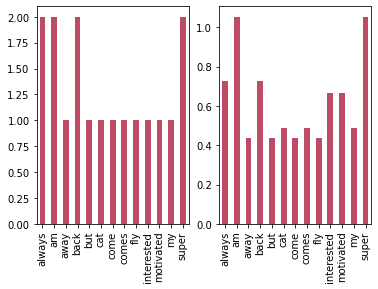

In [38]:
#total relevance
fig, axs = plt.subplots(1,2)
bow_data.transpose().sum(axis=1).plot.bar(alpha=0.7, cmap="RdYlBu", ax=axs[0])
tfidf_data.transpose().sum(axis=1).plot.bar(alpha=0.7, cmap="RdYlBu", ax=axs[1])

In [50]:
#Each row of the bow and tfidf can be used as a vector and are quantifiable as a distance measure
a = ["I like to fly away"]
vec_a = bow_vec.transform(a)
vec_b = tfidf_vec.transform(a)

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

index_ = np.argmax(cosine_similarity(vec_a, bow))
print("The most similar sentence for bow:")
print(corpus[index_])

index_ = np.argmax(cosine_similarity(vec_b, tfidf))
print("The most similar sentence for tfidf:")
print(corpus[index_])

The most similar sentence for bow:
I fly away but always come back
The most similar sentence for tfidf:
I fly away but always come back


In [55]:
coocc = bow_data.T.dot(bow_data)
display(coocc)

,always,am,away,back,but,cat,come,comes,fly,interested,motivated,my,super
always,2,0,1,2,1,1,1,1,1,0,0,1,0
am,0,2,0,0,0,0,0,0,0,1,1,0,2
away,1,0,1,1,1,0,1,0,1,0,0,0,0
back,2,0,1,2,1,1,1,1,1,0,0,1,0
but,1,0,1,1,1,0,1,0,1,0,0,0,0
cat,1,0,0,1,0,1,0,1,0,0,0,1,0
come,1,0,1,1,1,0,1,0,1,0,0,0,0
comes,1,0,0,1,0,1,0,1,0,0,0,1,0
fly,1,0,1,1,1,0,1,0,1,0,0,0,0
interested,0,1,0,0,0,0,0,0,0,1,0,0,1


### Using Gensim to make bow

The most similar sentence for LSI matrix:
[0.65676683 0.65676683 0.91548526 0.6444211 ]
I fly away but always come back


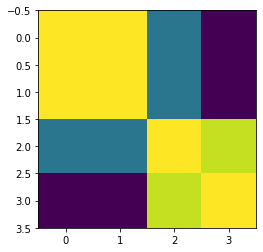

In [87]:
#from gensim: https://radimrehurek.com/gensim/auto_examples/index.html#documentation
from collections import defaultdict
from gensim import corpora, models, similarities

documents = [
    "I am super motivated",
    "I am super interested",
    "I fly away but always come back",
    "My cat always comes back"]

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]

frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1
        
texts = [
    [token for token in text]
    for text in texts
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

#Infer similarity with query
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)
doc = "I like to fly away"
vec_bow = dictionary.doc2bow(doc.lower().split())

#tfidf model
vec_tfidf = models.TfidfModel(corpus)  

#create similarity matrix of the corpus
index = similarities.MatrixSimilarity(lsi[corpus])
#create similarity query from the corpus
sims = index[vec_lsi]  # perform a similarity query against the corpus
print("The most similar sentence for LSI matrix:")
print(sims)
print(documents[np.argmax(sims)])
plt.imshow(index)

## Using Spacy and Gensim for Word Embedding

The previous methods are one of the strategies employed for feature extraction, which basically represents the conversion from textual information to numerical information, in the shape of a vector. These, however lack the meaningful relationship that words can have. For instance, words that totally differ, may have a similar meaning, or be related in some way, such as "King"-> "Queen", these words share a link, but are completely different. One process used to develop is word-embeddings. In the following tutorial, you will be able to:
- Use pre-trained models from Gensim and Spacy
- Train custom models from your own data with Gensim
- Use custom models on Spacy

In [92]:
#Spacy has their own trained models, which can be used
import spacy
import string
from spacy.lang.en.examples import sentences
from spacy.lang.en import stop_words as spacy_stopwords


nlp = spacy.load("en_core_web_sm")
doc = nlp(sentences[0])
for token in doc:
    print(token.text, token.has_vector, token.vector_norm, token.dep_)

Apple True 7.916962 nsubj
is True 8.597497 aux
looking True 8.683821 ROOT
at True 7.7375093 prep
buying True 9.099992 pcomp
U.K. True 7.721731 dobj
startup True 5.919402 advcl
for True 7.653146 prep
$ True 9.727608 quantmod
1 True 10.960312 compound
billion True 8.402847 pobj


The values of the third column are the word embedding vectors, from a pre-trained model from spacy.
You can basically use this vector values, and perform some relationships between words with it. Examples of this can be seen with the following examples:

[Text(-0.40049200683927255, 1.420541218190247, 'seagul'),
 Text(-2.5130987518190167, 0.2979087025710041, 'man'),
 Text(-0.6511119752062587, 0.20681964914099976, 'kid'),
 Text(3.680532430323632, 4.2465685735749945, 'like'),
 Text(-3.1403989781891064, -0.3959333428799018, 'dog'),
 Text(-2.367252620403543, -1.3863207554987438, 'bark'),
 Text(0.8865870282342975, -1.522459420452967, 'cry'),
 Text(-2.5479030754523957, 0.711394401453814, 'cat'),
 Text(3.419233044694922, -2.1119576629960886, 'leave'),
 Text(0.46309683797003665, 0.15359718872025988, 'queen'),
 Text(-3.26781115884069, 0.4433309166727122, 'king'),
 Text(3.5084026721372332, -1.6763308097086052, 'find'),
 Text(3.034744288956872, -1.0203674852474174, 'lose'),
 Text(3.968572512842877, -1.9918177749135295, 'wait'),
 Text(3.092660215940085, 5.17377966964347, 'away'),
 Text(0.4733048174179718, -1.3849505395320119, 'search'),
 Text(-3.7467060372926437, -0.15120886929402533, 'ball'),
 Text(2.9424865754633984, -1.3651309331921415, 'run'),


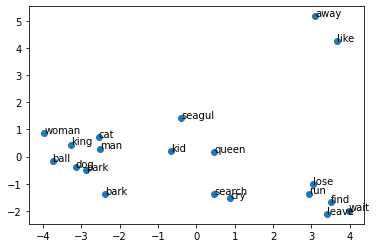

In [110]:
#from: https://www.nbshare.io/notebook/595607887/Understanding-Word-Embeddings-Using-Spacy-Python/
#to look for -> text classification with word embeddings

corpus = [
    "The King is waiting for his Queen.",
    "The man is lost and searches for his woman",
    "The cat ran away because the dog was barking",
    "A ball was found in the park. It seems the kid left it and now is crying like a seagul"
]

stop_words = spacy_stopwords.STOP_WORDS
punctuations = string.punctuation

def tokenize(sentence):
    sentence = nlp(sentence)
    # lemmatizing
    sentence = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in sentence ]
    # removing stop words
    sentence = [ word for word in sentence if word not in stop_words and word not in punctuations ]        
    return sentence

sentences = [tokenize(sentence) for sentence in corpus]

vocab = set()
for s in sentences:
    vocab.update(set(s))

#Extract vector coordinates in all dimensions (300) from spacy pre-trained word embeddings
vectors=[]
for token in vocab:
    vectors.append(nlp(token).vector)

#Use PCA to plot 2D word embedding representation
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(vectors)

ax = plt.subplot(111)
ax.plot(embeddings_2d[:, 0], embeddings_2d[:, 1], 'o')
[ax.annotate(vocab_i, (embeddings_2d[i,0], embeddings_2d[i,1])) for i, vocab_i in enumerate(vocab)]

Gensim can also be used to provide word embeddings and even train your own word2vec models:

In [171]:
#from: https://radimrehurek.com/gensim/models/word2vec.html
#from: https://petamind.com/word2vec-with-gensim-a-simple-word-embedding-example/
from gensim.test.utils import common_texts
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

sentences = [["cat", "say", "meow"], ["dog", "say", "woof"]]
model = Word2Vec(sentences, min_count=1, window=2)
words = list(model.wv.vocab)

#similarity between words:
print(model.wv.similarity("cat", "dog"))
print(model.wv.similarity("say", "woof"))

-0.084732555
-0.017275073


[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]


[Text(0.017048448, 0.012304687, 'human'),
 Text(-0.013347531, 0.016974783, 'computer'),
 Text(-0.010037229, -0.01488633, 'interface'),
 Text(0.01962219, -0.007985399, 'user'),
 Text(-0.0056091244, -0.01214992, 'system'),
 Text(-0.007676754, 0.0057421816, 'time')]

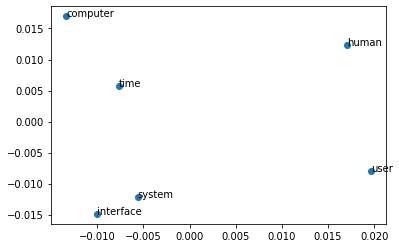

In [167]:
#using gensim to make sklearn word2vec model
from gensim.sklearn_api import W2VTransformer
# Create a model to represent each word by a 10 dimensional vector.
model = W2VTransformer(min_count=1, seed=1)
test_words = ["human", "computer", "interface", "user", "system", "time"]
wordvecs = model.fit(common_texts).transform(test_words)

print(common_texts)

pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(wordvecs)

ax = plt.subplot(111)
ax.plot(embeddings_2d[:, 0], embeddings_2d[:, 1], 'o')
[ax.annotate(vocab_i, (embeddings_2d[i,0], embeddings_2d[i,1])) for i, vocab_i in enumerate(test_words)]

#Finding word embedding distances:
#https://towardsdatascience.com/word-distance-between-word-embeddings-cc3e9cf1d632

